# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'MCForecastTools'

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [8]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_response_data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_response_data['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48892.80
The current value of your 5.3 ETH is $16142.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
APCA_API_KEY_ID = os.getenv("ALPACA_API_KEY")
APCA_API_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
base_url = "https://paper-api.alpaca.markets"
# Create the Alpaca API object
api = tradeapi.REST(
    APCA_API_KEY_ID,
    APCA_API_SECRET_KEY,
    base_url,
    api_version="v2")


In [11]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio


AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2022-04-11 04:00:00+00:00  104.44  104.505  104.17  104.28  8377902   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-04-11 04:00:00+00:00       29767  104.312835  444.11  445.0  439.39   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-11 04:00:00+00:00  439.92  89825549      779421  442.206374

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.28
Current SPY closing price: $439.92


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_agg_value:0.2f}")

The current value of your 200 AGG shares is $21996.00
The current value of your 50 SPY shares is $20856.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

value_data = {
    "amount": [crypto_value, shares_value]
}

tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(value_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,65034.798
shares,42852.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

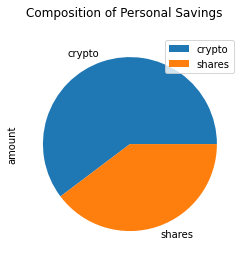

In [15]:
# Plot savings pie chart
df_savings.plot(kind='pie', title="Composition of Personal Savings", subplots=True)


In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set timeframe to "1Day"
timeframe = "1Day"

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-11', tz='America/New_York').isoformat()


In [19]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-11 04:00:00+00:00  108.79  108.98  108.75  108.89  2200830   
2017-04-12 04:00:00+00:00  108.93  109.20  108.89  109.13  2432965   
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-04-11 04:00:00+00:00       11420  108.874603  234.90  235.18  233.34   
2017-04-12 04:00:00+00:00       10372  109.013960  234.80  234.96  233.77   
2017-04-13 04:00:00+00:00       13465  109.262713  233.65  234.49  232.51   
2017-04-17 04:00:00+00:00        7973  109.294030  233.12  234.57  232.88   
2017-04-18 04:00:00+00:00       14488  109.579396  233.71  234.49  233.08   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-04-11 04:00:00+00:00  235.06  88045276      306525  234.499802  
2017-04-12 04:00:00+00:00  234.03  81864436      262862  234.298297  
2017-04-13 04:00:00+00:00  232.51  92880394      303955  233.364725  
2017-04-17 04:00:00+00:00  234.57  68405367      213643  233.870859  
2017-04-18 04:00:00+00:00  233.87  83225836      245279  233.958942

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

NameError: name 'MCSimulation' is not defined

In [ ]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()


In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()


In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)


NameError: name 'MC_thirty_year' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60264.84 and $705711.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90397.26 and $1058567.84
